C:\Users\yuta8\AppData\Local\Temp\ipykernel_12276\3140021280.py:17: RuntimeWarning: overflow encountered in exp
  return (np.random.rand()<np.exp(-(E_curr-E_new)/T))


best x: 2.8680005005744658, best objective: 7.81412435323432


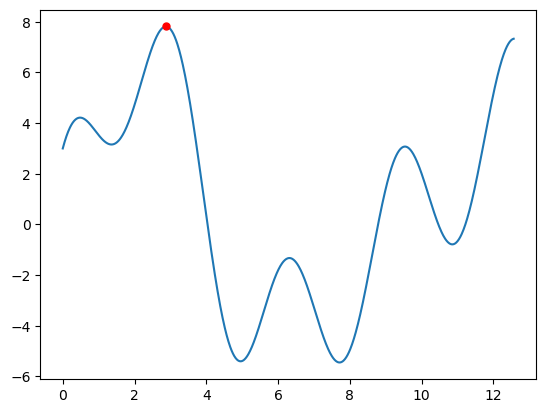

In [1]:
#simulated annealing(SA)
import numpy as np
import matplotlib.pyplot as plt

def objective(x):
    return 2*np.sin(x)+3*np.cos(2*x)+5*np.sin(2/3*x)

def GENERATE():
    index = np.random.choice(n, 1)
    return data_x[index]
    
def ACCEPT(E_curr, E_new, T):
    if E_new-E_curr <=0:
        return 1
    else:
        #新しい解が悪くても一定の確率で受け入れる
        return (np.random.rand()<np.exp(-(E_curr-E_new)/T))
    
def REDUCE(T):
    return gamma*T

gamma = 0.9
n = 1000
data_x = np.linspace(0, 4*np.pi, n)
data_y = objective(data_x)


def simulated_annealing(objective, n_iter):
    """
    objective:評価関数
    To:初期温度
    """
    x = np.zeros((n_iter, ))
    E = np.zeros((n_iter, ))
    
    T = 1.
    
    #step1 : 評価関数を定義し, 初期点をランダムに選ぶ. 初期温度(T)を設定する
    index = 700
    x_curr = data_x[index]
    E_curr = objective(x_curr)
    
    x_best = x_curr
    E_best = E_curr
    
    for i in range(n_iter):
        #step3 : 温度Tを徐々に低下させる
        T= REDUCE(T)
        
        #step2-1 : 現在の点からランダムに隣接点を選ぶ
        x_new = GENERATE()
        #step2-2 : 新しい点の評価値を計算する
        E_new = objective(x_new)
        #step2-3 : 新しい点が現在の点より評価値が良ければ, その点に移動する
        #step2-4 : 評価値が悪くても, 確率的にその点に移動する(確率はTに依存する)
        if ACCEPT(E_curr, E_new, T):
            x_curr = x_new
            E_curr = E_new

        if E_new>E_best:
            x_best = x_new
            E_best = E_new

        x[i] = x_best
        E[i] = E_best
    
    #step5 : 最終的な点な最適解として出力
    return x, E
        
x, E = simulated_annealing(objective, n_iter=100)        
index_best = np.argmax(E)
print("best x: {}, best objective: {}".format(x[index_best], E[index_best]))
    
plt.plot(data_x, data_y)   
plt.plot(x[index_best], E[index_best], marker='o', c='red', markersize=5)
plt.show()

C:\Users\yuta8\AppData\Local\Temp\ipykernel_12276\821996511.py:24: RuntimeWarning: overflow encountered in exp
  return (np.random.rand()<np.exp(-(E_curr-E_new)/T))


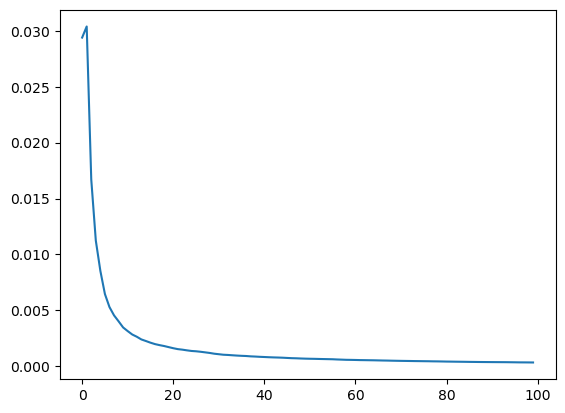

処理時間：22.994731664657593秒


In [3]:
#simulated annealing(SA)
import numpy as np
import matplotlib.pyplot as plt
import time
start_time = time.time()

#objective:評価関数
def objective(x, y):
    return (x-0.3)**2+(y-0.4)**2

def GENERATE_x():
    index = np.random.choice(n, number_of_people)
    return data_x[index]

def GENERATE_y():
    index = np.random.choice(n, number_of_people)
    return data_y[index]

def ACCEPT(E_curr, E_new, T):
    if E_new-E_curr <=0:
        return 1
    else:
        #新しい解が悪くても一定の確率で受け入れる
        return (np.random.rand()<np.exp(-(E_curr-E_new)/T))
    
def REDUCE(T):
    return gamma*T

gamma = 0.9
n = 100
data_x = np.linspace(0, 1, n)
data_y = np.linspace(0, 1, n)
data_z = objective(data_x, data_y)
n_iter=100  
number_of_people=10
meanc = 1000
result = 1000*np.ones((n_iter, meanc))
for j in range(meanc):
    
    x = np.zeros((n_iter, number_of_people))
    y = np.zeros((n_iter, number_of_people))
    E = np.zeros((n_iter, number_of_people))
    
    T = 1.
    
    #step1 : 評価関数を定義し, 初期点をランダムに選ぶ. 初期温度(T)を設定する
    index = np.random.choice(n, number_of_people)
    x_curr = data_x[index]  #10×1
    y_curr = data_y[index]  #10×1
    E_curr = objective(x_curr, y_curr)  #10×1
    
    x_best = x_curr
    y_best = y_curr
    E_best = E_curr
    
    for i in range(n_iter):
        #step3 : 温度Tを徐々に低下させる
        T= REDUCE(T)
        
        #step2-1 : 現在の点からランダムに隣接点を選ぶ
        x_new = GENERATE_x()
        y_new = GENERATE_y()
        #step2-2 : 新しい点の評価値を計算する
        E_new = objective(x_new, y_new)
        #step2-3 : 新しい点が現在の点より評価値が良ければ, その点に移動する
        #step2-4 : 評価値が悪くても, 確率的にその点に移動する(確率はTに依存する)
        for k in range(number_of_people):
            if ACCEPT(E_curr[k], E_new[k], T):
                x_curr[k] = x_new[k]
                y_curr[k] = y_new[k]
                E_curr[k] = E_new[k]

            if E_new[k]<E_best[k]:
                x_best[k] = x_new[k]
                y_best[k] = y_new[k]
                E_best[k] = E_new[k]

        x[i] = x_best
        y[i] = y_best
        E[i] = E_best
    
        #step5 : 最終的な点な最適解として出力
      
        result[i,j] = np.min(E[i])
        if i>1 and result[i,j] > result[i-1,j]:
            result[i,j] = result[i-1,j]

plt.plot(np.mean(result, axis=1))    
plt.show()
end_time = time.time()
execution_time = end_time - start_time
print(f"処理時間：{execution_time}秒")